# TP Apprentissage non-supervisé
## Clustering
## Laure FEUILLET - Maël PLANTEC

## I - Jeux de données

In [2]:
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt

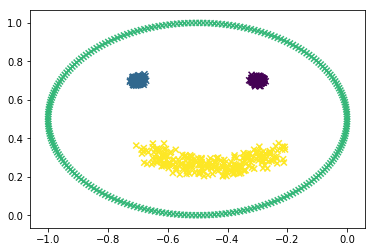

In [3]:
smile_data = arff.loadarff(open('smile1.arff', 'rt'))
smile = np.array(smile_data)[0]
plt.scatter(smile['a0'], smile['a1'], c=smile['class'], marker='x')
plt.show()

Le graphique ci-dessus représente les clusters désirés pour le dataset *smile*. Il possède des composantes non convexes bien identifiées, avec des densités variables : les yeux sont plus denses que la bouche par exemple.

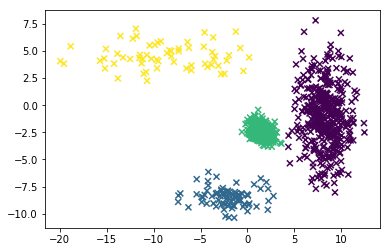

In [4]:
d2c4_data = arff.loadarff(open('2d-4c-no4.arff', 'rt'))
d2c4 = np.array(d2c4_data)[0]
plt.scatter(d2c4['a0'], d2c4['a1'], c=d2c4['class'], marker='x')
plt.show()

Il s'agit ici du deuxième dataset que nous avons choisi d'étudier, appelé *d2c4*. Les formes sont convexes et de deux denisté différentes. Il y a également un peu de bruit.

## II - Clustering k-Means 

In [5]:
from sklearn import cluster
from sklearn import metrics
import time

### Dataset *d2c4*

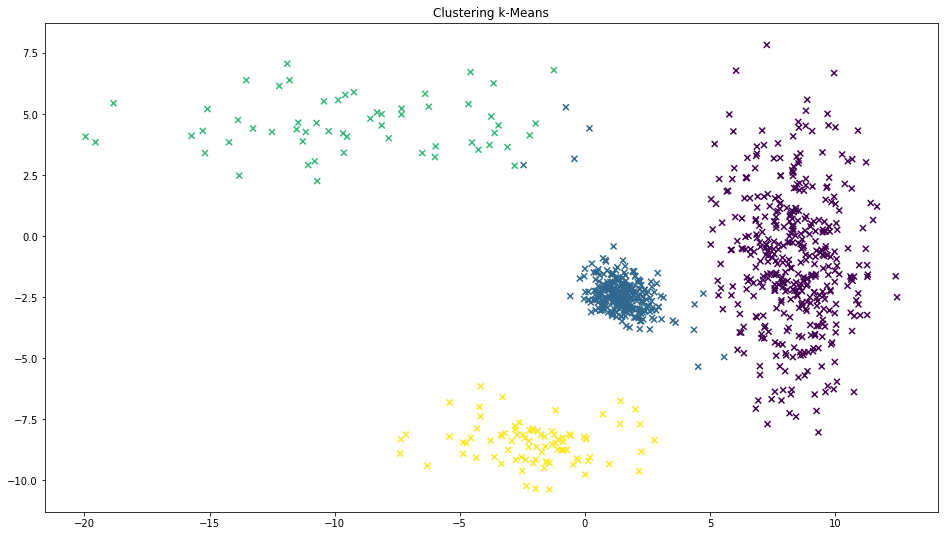

In [ ]:
d2c4_train = list(zip(d2c4['a0'], d2c4['a1']))
kmeans_d2c4  = cluster.KMeans(n_clusters=len(np.unique(d2c4['class'])), init='k-means++')
kmeans_d2c4.fit(d2c4_train)

plt.figure(figsize=(16, 9))
plt.scatter(d2c4['a0'], d2c4['a1'], c=kmeans_d2c4.labels_, marker='x')
plt.title("Clustering k-Means")
plt.show()

Le clustering obtenu avec k-Means pour `k=4`correspond quasiment à celui attendu. On remarque tout de même quelques points du cluster vert qui ont été attribués au cluster violet. Ce dernier est en effet plus dense et à donc tendance à attirer les points à lui. 

In [ ]:
range_clusters = range(2, 11)
kmeans_d2c4_nb_clusters = []
for nb_clusters in range_clusters:
    kmeans_d2c4  = cluster.KMeans(n_clusters=nb_clusters, init='k-means++')
    kmeans_d2c4.fit(d2c4_train)
    # Indice de Davies Bouldin
    db = metrics.davies_bouldin_score(d2c4_train, kmeans_d2c4.labels_)
    # Coefficient de Silhouette
    silhouette = metrics.silhouette_score(d2c4_train, kmeans_d2c4.labels_)
    kmeans_d2c4_nb_clusters.append((nb_clusters, kmeans_d2c4.labels_, db, silhouette))
    print(f"{nb_clusters} done")

In [ ]:
plt.figure(figsize=(16, 9))
plt.suptitle("Clustering k-Means en fonction du nombre de clusters\n (sur le dataset d2c4)")

i=0
for res in kmeans_d2c4_nb_clusters:
    subplot = plt.subplot(3, 3, i+1)
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)
    plt.scatter(d2c4['a0'], d2c4['a1'], c=res[1], marker='x', cmap='tab10')
    plt.title(f"{res[0]} clusters")
    i = i + 1
    
plt.show()

In [ ]:
kmeans_d2c4_nb_clusters_zip = list(zip(*kmeans_d2c4_nb_clusters))

plt.figure(figsize=(16,9))
plt.plot(kmeans_d2c4_nb_clusters_zip[0], kmeans_d2c4_nb_clusters_zip[2], 'o-', label='Indice de Davies Bouldin')
plt.plot(kmeans_d2c4_nb_clusters_zip[0], kmeans_d2c4_nb_clusters_zip[3], 'x-', label='Coefficient de Silhouette', color='orange')
plt.title("Evaluation de k-Means en fonction du nombre de clusters \n (sur le dataset d2c4)")
plt.xlabel('Nombre de clusters')
plt.ylabel('Evaluation')
plt.legend()
plt.grid()
plt.show()

En prenant en compte l'indice de Davies Bouldin (à minimiser) et le coefficient de Silhouette (à maximiser), on observe que le meilleur nombre de clusters est 4 pour le dataset *d2c4*. C'est parfait ! 

### Dataset *smile*

In [ ]:
smile_train = list(zip(smile['a0'], smile['a1']))

range_clusters = range(2, 11)
kmeans_smile_nb_clusters = []
for nb_clusters in range_clusters:
    kmeans_smile  = cluster.KMeans(n_clusters=nb_clusters, init='k-means++')
    kmeans_smile.fit(smile_train)
    # Indice de Davies Bouldin
    db = metrics.davies_bouldin_score(smile_train, kmeans_smile.labels_)
    # Coefficient de Silhouette
    silhouette = metrics.silhouette_score(smile_train, kmeans_smile.labels_)
    kmeans_smile_nb_clusters.append((nb_clusters, kmeans_smile.labels_, db, silhouette))

In [ ]:
plt.figure(figsize=(16, 9))

i=0
for res in kmeans_smile_nb_clusters:
    subplot = plt.subplot(3, 3, i+1)
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)
    plt.scatter(smile['a0'], smile['a1'], c=res[1], marker='x', cmap='tab10')
    plt.title(f"{res[0]} clusters")
    i = i + 1
    
plt.show()

In [ ]:
kmeans_smile_nb_clusters_zip = list(zip(*kmeans_smile_nb_clusters))

plt.figure(figsize=(16,9))
plt.plot(kmeans_smile_nb_clusters_zip[0], kmeans_smile_nb_clusters_zip[2], 'o-', label='Indice de Davies Bouldin')
plt.plot(kmeans_smile_nb_clusters_zip[0], kmeans_smile_nb_clusters_zip[3], 'x-', label='Coefficient de Silhouette', color='orange')
plt.title("Evaluation de k-Means en fonction du nombre de clusters \n (sur le dataset smile)")
plt.xlabel('Nombre de clusters')
plt.ylabel('Evaluation')
plt.legend()
plt.grid()
plt.show()

Cette fois-ci sur le dataset *smile*, on ne remarque pas de nombre de clusters particulièrement meilleur que les autres. Effectivement en regardant chaque clustering, la méthode ne parvient pas à distinguer les formes non convexes, ce qui expliue certainement cette imprécision. 

## III - Clustering agglomératif

In [ ]:
from sklearn import cluster
from sklearn import metrics
import time

### Dataset *d2c4*

In [ ]:
d2c4_train = list(zip(d2c4['a0'], d2c4['a1']))
agglo_d2c4  = cluster.AgglomerativeClustering(n_clusters=len(np.unique(d2c4['class'])))
agglo_d2c4.fit(d2c4_train)

plt.figure(figsize=(16, 9))
plt.scatter(d2c4['a0'], d2c4['a1'], c=agglo_d2c4.labels_, marker='x')
plt.title("Clustering agglomératif")
plt.show()

#### `linkage`

In [ ]:
range_linkage = ['single', 'complete', 'average', 'ward']
agglo_linkage = []
for linkage in range_linkage:
    agglo  = cluster.AgglomerativeClustering(n_clusters=4, linkage=linkage)
    debut = time.time()
    agglo.fit(d2c4_train)
    duree = time.time() - debut
    # Indice de Davies Bouldin
    db = metrics.davies_bouldin_score(d2c4_train, agglo.labels_)
    # Coefficient de Silhouette
    silhouette = metrics.silhouette_score(d2c4_train, agglo.labels_)
    agglo_linkage.append((linkage, agglo.labels_, db, silhouette, duree))

In [ ]:
plt.figure(figsize=(16, 9))
plt.suptitle("Clustering agglomératif en fonction du linkage\n (sur le dataset d2c4)")

i=0
for res in agglo_linkage:
    subplot = plt.subplot(2, 2, i+1)
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)
    plt.scatter(d2c4['a0'], d2c4['a1'], c=res[1], marker='x', cmap='tab10')
    plt.title(f"linkage \"{res[0]}\"")
    i = i + 1
    
plt.show()

In [ ]:
agglo_linkage_zip = list(zip(*agglo_linkage))

plt.figure(figsize=(16,9))
plt.suptitle("Clustering agglomératif en fonction du linkage\n (sur le dataset d2c4)")

plt.subplot(2, 1, 1)
plt.plot(agglo_linkage_zip[0], agglo_linkage_zip[2], 'o-', label='Indice de Davies Bouldin')
plt.plot(agglo_linkage_zip[0], agglo_linkage_zip[3], 'x-', label='Coefficient de Silhouette', color='orange')
plt.ylabel('Evaluation')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(agglo_linkage_zip[0], agglo_linkage_zip[4], 'x-', c='green')
plt.xlabel('linkage')
plt.ylabel('Durée')
plt.grid()

plt.show()

D'après les critères d'évaluation ci-dessus, le linkage `ward` est le plus adapté pour le dataset `d2c4`.

#### Nombre de clusters

In [ ]:
range_nb_clusters = range(2, 11)
agglo_nb_clusters = []
for nb_clusters in range_nb_clusters:
    agglo  = cluster.AgglomerativeClustering(n_clusters=nb_clusters, linkage='ward')
    debut = time.time()
    agglo.fit(d2c4_train)
    duree = time.time() - debut
    # Indice de Davies Bouldin
    db = metrics.davies_bouldin_score(d2c4_train, agglo.labels_)
    # Coefficient de Silhouette
    silhouette = metrics.silhouette_score(d2c4_train, agglo.labels_)
    agglo_nb_clusters.append((nb_clusters, agglo.labels_, db, silhouette, duree))

In [ ]:
plt.figure(figsize=(16, 9))
plt.suptitle("Clustering agglomératif en fonction du nombre de clusters\n (sur le dataset d2c4)")

i=0
for res in agglo_nb_clusters:
    subplot = plt.subplot(3, 3, i+1)
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)
    plt.scatter(d2c4['a0'], d2c4['a1'], c=res[1], marker='x', cmap='tab10')
    plt.title(f"{res[0]} clusters")
    i = i + 1
    
plt.show()

In [ ]:
agglo_nb_clusters_zip = list(zip(*agglo_nb_clusters))

plt.figure(figsize=(16,9))
plt.suptitle("Clustering agglomératif en fonction du nombre de clusters\n (sur le dataset d2c4)")

plt.subplot(2, 1, 1)
plt.plot(agglo_nb_clusters_zip[0], agglo_nb_clusters_zip[2], 'o-', label='Indice de Davies Bouldin')
plt.plot(agglo_nb_clusters_zip[0], agglo_nb_clusters_zip[3], 'x-', label='Coefficient de Silhouette', color='orange')
plt.ylabel('Evaluation')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(agglo_nb_clusters_zip[0], agglo_nb_clusters_zip[4], 'x-', c='green')
plt.xlabel('Nombre de clusters')
plt.ylabel('Durée')
plt.grid()

plt.show()

D'après les deux critères d'évaluation choisis, un nombre de 4 clusters apparait comme le plus adapté pour le dataset `d2c4`.

### Dataset *smile*

In [ ]:
smile_train = list(zip(smile['a0'], smile['a1']))

#### `linkage`

In [ ]:
range_linkage = ['single', 'complete', 'average', 'ward']
agglo_smile_linkage = []
for linkage in range_linkage:
    debut = time.time()
    agglo  = cluster.AgglomerativeClustering(n_clusters=4, linkage=linkage)
    duree = time.time() - debut
    agglo.fit(smile_train)
    # Indice de Davies Bouldin
    db = metrics.davies_bouldin_score(smile_train, agglo.labels_)
    # Coefficient de Silhouette
    silhouette = metrics.silhouette_score(smile_train, agglo.labels_)
    agglo_smile_linkage.append((linkage, agglo.labels_, db, silhouette, duree))

In [ ]:
plt.figure(figsize=(16, 9))
plt.suptitle("Clustering agglomératif en fonction du linkage\n (sur le dataset smile)")

i=0
for res in agglo_smile_linkage:
    subplot = plt.subplot(2, 2, i+1)
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)
    plt.scatter(smile['a0'], smile['a1'], c=res[1], marker='x', cmap='tab10')
    plt.title(f"linkage \"{res[0]}\"")
    i = i + 1
    
plt.show()

In [ ]:
agglo_smile_linkage_zip = list(zip(*agglo_smile_linkage))

plt.figure(figsize=(16,9))
plt.suptitle("Clustering agglomératif en fonction du linkage\n (sur le dataset smile)")

plt.subplot(2, 1, 1)
plt.plot(agglo_smile_linkage_zip[0], agglo_smile_linkage_zip[2], 'o-', label='Indice de Davies Bouldin')
plt.plot(agglo_smile_linkage_zip[0], agglo_smile_linkage_zip[3], 'x-', label='Coefficient de Silhouette', color='orange')
plt.ylabel('Evaluation')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(agglo_smile_linkage_zip[0], agglo_smile_linkage_zip[4], 'x-', c='green')
plt.xlabel('linkage')
plt.ylabel('Durée')
plt.grid()

plt.show()

Visuellement, on observe que le `linkage=single` est le plus adapté. Cependant, les indicateurs ne nous montrent pas du tout ce résultat. Cela est du aux forme non convexes du dataset `smile`.

#### Nombre de clusters

In [ ]:
range_nb_clusters = range(2, 11)
agglo_smile_nb_clusters = []
for nb_clusters in range_nb_clusters:
    agglo = cluster.AgglomerativeClustering(n_clusters=nb_clusters, linkage='single')
    debut = time.time()
    agglo.fit(smile_train)
    duree = time.time() - debut
    # Indice de Davies Bouldin
    db = metrics.davies_bouldin_score(smile_train, agglo.labels_)
    # Coefficient de Silhouette
    silhouette = metrics.silhouette_score(smile_train, agglo.labels_)
    agglo_smile_nb_clusters.append((nb_clusters, agglo.labels_, db, silhouette))

In [ ]:
plt.figure(figsize=(16, 9))
plt.suptitle("Clustering agglomératif en fonction du nombre de clusters\n (sur le dataset smile)")

i=0
for res in agglo_smile_nb_clusters:
    subplot = plt.subplot(3, 3, i+1)
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)
    plt.scatter(smile['a0'], smile['a1'], c=res[1], marker='x', cmap='tab10')
    plt.title(f"{res[0]} clusters")
    i = i + 1
    
plt.show()

A partir de 4 clusters, on ne remarque pas de changement notable dans l'allure des clusters trouvés par l'algorithme. 

In [ ]:
agglo_smile_nb_clusters_zip = list(zip(*agglo_smile_nb_clusters))

plt.figure(figsize=(16,9))
plt.suptitle("Clustering agglomératif en fonction du nombre de clusters \n (sur le dataset smile)")

plt.subplot(2, 1, 1)
plt.plot(agglo_smile_nb_clusters_zip[0], agglo_smile_nb_clusters_zip[2], 'o-', label='Indice de Davies Bouldin')
plt.plot(agglo_smile_nb_clusters_zip[0], agglo_smile_nb_clusters_zip[3], 'x-', label='Coefficient de Silhouette', color='orange')
plt.ylabel('Evaluation')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(agglo_smile_nb_clusters_zip[0], agglo_smile_nb_clusters_zip[3], 'x-', c='green')
plt.xlabel('Nombre de clusters')
plt.ylabel('Durée')
plt.grid()

plt.show()

Nous avons vu précedemment que ces deux indicateurs ne sont pas adaptés aux formes non convexes.

#### `affinity` = distance
`affinity : string or callable, default: “euclidean”`

> Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.


In [ ]:
range_affinity = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
agglo_smile_affinity = []
for affinity in range_affinity:
    agglo = cluster.AgglomerativeClustering(n_clusters=4, linkage='single', affinity=affinity)
    debut = time.time()
    agglo.fit(smile_train)
    duree = time.time() - debut
    # Indice de Davies Bouldin
    db = metrics.davies_bouldin_score(smile_train, agglo.labels_)
    # Coefficient de Silhouette
    silhouette = metrics.silhouette_score(smile_train, agglo.labels_)
    agglo_smile_affinity.append((affinity, agglo.labels_, db, silhouette, duree))

In [ ]:
plt.figure(figsize=(16, 9))
plt.suptitle("Clustering agglomératif en fonction de la distance\n (sur le dataset smile)")

i=0
for res in agglo_smile_affinity:
    subplot = plt.subplot(2, 3, i+1)
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)
    plt.scatter(smile['a0'], smile['a1'], c=res[1], marker='x', cmap='tab10')
    plt.title(f"distance \"{res[0]}\"")
    i = i + 1
    
plt.show()

Seule la distance `cosine` change la solution de clustering.

## IIII - Clustering DBSCAN

In [ ]:
from sklearn import cluster
from sklearn import metrics
import time

In [ ]:
d2c4_train = list(zip(d2c4['a0'], d2c4['a1']))

# 'euclidean', 'l1', 'l2', 'manhattan', 'cosine'

dbscan_d2c4  = cluster.DBSCAN(eps = 1.1, min_samples = 8, metric = "cityblock")
dbscan_d2c4.fit(d2c4_train)

plt.figure(figsize=(16, 9))
plt.scatter(d2c4['a0'], d2c4['a1'], c=dbscan_d2c4.labels_, marker='x')
plt.title("Clustering agglomératif")
plt.show()
print(len(np.unique(dbscan_d2c4.labels_)))
print(np.unique(dbscan_d2c4.labels_))

In [ ]:
for eps in [1.1, 2, 3]:
    print(f"Variations de min_samples pour eps = {eps}")
    range_min_samples = range(1, 16)
    dbscan_min_samples = []
    for min_samples in range_min_samples:
        dbscan  = cluster.DBSCAN(eps=eps, min_samples=min_samples)
        debut = time.time()
        dbscan.fit(d2c4_train)
        duree = time.time() - debut
        # Indice de Davies Bouldin
        db = metrics.davies_bouldin_score(d2c4_train, dbscan.labels_)
        # Coefficient de Silhouette
        silhouette = metrics.silhouette_score(d2c4_train, dbscan.labels_)
        dbscan_min_samples.append((min_samples, dbscan.labels_, db, silhouette, duree))
    plt.figure(figsize=(16, 9))

    i=0
    for res in dbscan_min_samples:
        subplot = plt.subplot(4, 4, i+1)
        subplot.get_xaxis().set_visible(False)
        subplot.get_yaxis().set_visible(False)
        
        plt.scatter(d2c4['a0'], d2c4['a1'], c=res[1], marker='x', cmap='tab10')
        plt.title(f"min_samples = {res[0]} ({len(np.unique(res[1]))} clusters)")
        i = i + 1
    plt.show()
    print("--------------------------------------------------------------------")

In [ ]:
#for eps in np.arange(0.00, 0.3, 0.05):
for eps in [0.1, 0.5, 1, 2, 5, 10]:   
    print(f"Variations de min_samples pour eps = {eps}")
    # range_min_samples = range(1, 11)
    range_min_samples = range(1, 30, 2)
    dbscan_min_samples = []
    for min_samples in range_min_samples:
        dbscan  = cluster.DBSCAN(eps=1.1, min_samples=min_samples)
        debut = time.time()
        dbscan.fit(smile_train)
        duree = time.time() - debut
        # Indice de Davies Bouldin
        #db = metrics.davies_bouldin_score(smile_train, dbscan.labels_)
        # Coefficient de Silhouette
        #silhouette = metrics.silhouette_score(smile_train, dbscan.labels_)
        #dbscan_min_samples.append((min_samples, dbscan.labels_, db, silhouette, duree))
        dbscan_min_samples.append((min_samples, dbscan.labels_, duree))
    plt.figure(figsize=(16, 9))

    i=0
    for res in dbscan_min_samples:
        subplot = plt.subplot(4, 4, i+1)
        subplot.get_xaxis().set_visible(False)
        subplot.get_yaxis().set_visible(False)
        plt.scatter(smile['a0'], smile['a1'], c=res[1], marker='x', cmap='tab20')
        plt.title(f"min_samples = {res[0]} ({len(np.unique(res[1]))} clusters)")
        i = i + 1
    plt.show()
    print("--------------------------------------------------------------------")

## IV - Clustering HDBSCAN

In [ ]:
import hdbscan

In [ ]:
d2c4_train = list(zip(d2c4['a0'], d2c4['a1']))
hdbscan_d2c4  = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
hdbscan_d2c4.fit(d2c4_train)

plt.figure(figsize=(16, 9))
plt.scatter(d2c4['a0'], d2c4['a1'], c=hdbscan_d2c4.labels_, marker='x', cmap='tab20')
plt.title(f"Clustering agglomératif ({len(np.unique(hdbscan_d2c4.labels_))} clusters)")
plt.show()

In [ ]:
plt.figure(figsize=(16, 9))
hdbscan_d2c4.minimum_spanning_tree_.plot()
plt.show()

In [ ]:
plt.figure(figsize=(16, 9))
hdbscan_d2c4.condensed_tree_.plot(select_clusters=True, colorbar=True)
plt.show()

In [ ]:
d2c4_train = list(zip(d2c4['a0'], d2c4['a1']))
hdbscan_d2c4  = hdbscan.HDBSCAN()
hdbscan_d2c4.fit(d2c4_train)

plt.figure(figsize=(16, 9))
plt.scatter(d2c4['a0'], d2c4['a1'], c=hdbscan_d2c4.labels_, marker='x', cmap='tab20')
plt.title(f"Clustering agglomératif ({len(np.unique(hdbscan_d2c4.labels_))} clusters)")
plt.show()